In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('../../src/data/city_growth_models/population-ekurhuleni_1950_to_2035.csv') 

In [3]:
df 

,growth,growthRate,population,year
0,62068,0.012781,4918391,2035
1,62816,0.013104,4856323,2034
2,63545,0.013435,4793507,2033
3,64245,0.013770,4729962,2032
4,64992,0.014126,4665717,2031
...,...,...,...,...
81,13132,0.022499,596796,1954
82,12826,0.022469,583664,1953
83,12578,0.022531,570838,1952
84,12285,0.022501,558260,1951


In [4]:
df.isnull().sum()

growth        0
growthRate    0
population    0
year          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   growth      86 non-null     int64  
 1   growthRate  86 non-null     float64
 2   population  86 non-null     int64  
 3   year        86 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 2.8 KB


In [6]:
df.describe()

,growth,growthRate,population,year
count,86.000000,86.000000,8.600000e+01,86.000000
mean,50842.046512,0.025970,2.158108e+06,1992.500000
std,32235.442129,0.013018,1.421696e+06,24.969982
min,0.000000,0.000000,5.459750e+05,1950.000000
25%,21409.500000,0.020568,9.221735e+05,1971.250000
50%,62442.000000,0.022500,1.561090e+06,1992.500000
75%,75437.000000,0.026642,3.363576e+06,2013.750000
max,130236.000000,0.070433,4.918391e+06,2035.000000


### Outliers

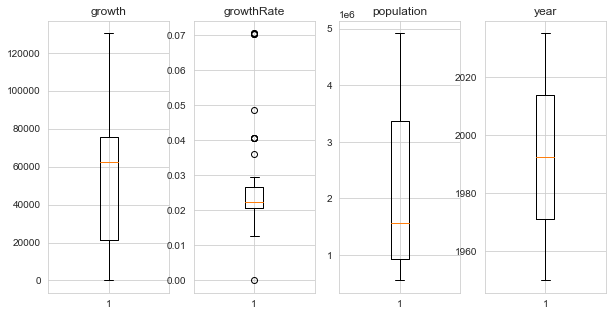

In [7]:
columns = ['growth','growthRate','population','year']
fig, axs = plt.subplots(ncols=len(columns), figsize=(10, 5))
for i, col in enumerate(columns):
    axs[i].boxplot(df[col])
    axs[i].set_title(col)
    
plt.show()

In [8]:
def detect_outliers(dataset, columns):
    df = dataset.copy()
    df[columns] = stats.zscore(df[columns])
    outliers = df[(df[columns] < -3) | (df[columns] > 3)]
    print(f"The number of outliers: {outliers.shape[0]}")
    df = df[(df[columns] > -3) & (df[columns] < 3)].reset_index(drop=True)
    return df

In [9]:
detect_outliers(df,'growth')
detect_outliers(df,'population')
detect_outliers(df,'growthRate')
detect_outliers(df,'year')

The number of outliers: 0
The number of outliers: 0
The number of outliers: 5
The number of outliers: 0


,growth,growthRate,population,year
0,62068,0.012781,4918391,1.712026
1,62816,0.013104,4856323,1.671743
2,63545,0.013435,4793507,1.631460
3,64245,0.013770,4729962,1.591178
4,64992,0.014126,4665717,1.550895
...,...,...,...,...
81,13132,0.022499,596796,-1.550895
82,12826,0.022469,583664,-1.591178
83,12578,0.022531,570838,-1.631460
84,12285,0.022501,558260,-1.671743


In [10]:
def remove_outliers(dataset,columns):
    q3 = dataset[columns].quantile(0.75)
    q1 = dataset[columns].quantile(0.25)
    iqr = q3 - q1
    upper_fence = q3 + 1.5*iqr
    dataset.loc[dataset[columns]>=upper_fence,columns] = upper_fence

In [11]:
remove_outliers(df,'growthRate')
detect_outliers(df,'growthRate')

The number of outliers: 1


,growth,growthRate,population,year
0,62068,-1.659936,4918391,2035
1,62816,-1.610190,4856323,2034
2,63545,-1.559422,4793507,2033
3,64245,-1.507909,4729962,2032
4,64992,-1.453036,4665717,2031
...,...,...,...,...
80,13428,-0.165500,610224,1955
81,13132,-0.165639,596796,1954
82,12826,-0.170332,583664,1953
83,12578,-0.160799,570838,1952


In [12]:
df = df[df['growthRate'] >0]
df

,growth,growthRate,population,year
0,62068,0.012781,4918391,2035
1,62816,0.013104,4856323,2034
2,63545,0.013435,4793507,2033
3,64245,0.013770,4729962,2032
4,64992,0.014126,4665717,2031
...,...,...,...,...
80,13428,0.022500,610224,1955
81,13132,0.022499,596796,1954
82,12826,0.022469,583664,1953
83,12578,0.022531,570838,1952


In [13]:
detect_outliers(df,'growthRate')

The number of outliers: 0


,growth,growthRate,population,year
0,62068,-1.840938,4918391,2035
1,62816,-1.787150,4856323,2034
2,63545,-1.732256,4793507,2033
3,64245,-1.676558,4729962,2032
4,64992,-1.617225,4665717,2031
...,...,...,...,...
80,13428,-0.225063,610224,1955
81,13132,-0.225213,596796,1954
82,12826,-0.230288,583664,1953
83,12578,-0.219980,570838,1952


In [14]:
df['City'] = 'ekurhuleni' 
df['Country'] = 'South Africa' 
df.rename(columns={'year':'Year' } , inplace=True )

In [15]:
df.columns 

Index(['growth', 'growthRate', 'population', 'Year', 'City', 'Country'], dtype='object')

In [18]:
df.rename(columns={'growth':'population_growth' , 'growthRate' : 'population_growth_Rate' } , inplace=True )

In [16]:
df.to_csv('../../task 2 data preprocessing/processedData/population-ekurhuleni_1950_to_2035_processed.csv',index=False)
